# Exercício avaliativo 2
## Introdução a Física Estatística e Computacional

Luís Felipe Ramos Ferreira - 2019022553

Observação: O código foi feito feio em conjunto com os colegas Igor Lacerda e Gabriel Rocha. No entanto, é claro, as análises, testes e comentários foram feitos individualmente.

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [2]:
@jit(nopython=True)
def vizinhos(N: int):
    # Define a tabela de vizinhos
    L = int(np.sqrt(N))
    viz = np.zeros((N, 4), dtype=np.int16)
    for k in range(N):
        viz[k, 0] = k + 1
        if (k + 1) % L == 0:
            viz[k, 0] = k + 1 - L
        viz[k, 1] = k + L
        if k > (N - L - 1):
            viz[k, 1] = k + L - N
        viz[k, 2] = k - 1
        if k % L == 0:
            viz[k, 2] = k + L - 1
        viz[k, 3] = k - L
        if k < L:
            viz[k, 3] = k + N - L
    return viz

In [3]:
@jit(nopython=True)
def algoritmo_de_metropolis(L: int, T: float, passos: int):
    energia: np.ndarray = np.zeros(passos, dtype=np.int32)
    magnetização: np.ndarray = np.zeros(passos, dtype=np.int32)

    spins: np.ndarray = np.array([-1, 1], dtype=np.int8)

    variações_de_energia = np.array([8.0, 4.0, 0.0, -4.0, -8.0], dtype=np.float64)
    expoentes = np.exp(variações_de_energia / T)

    N = L * L
    S = np.random.choice(spins, N)

    viz = vizinhos(N)

    for i in range(passos):
        for k in np.arange(N):
            indice = int(S[k] * np.sum(S[viz[k]]) * 0.5 + 2)
            if np.random.rand() < expoentes[indice]:
                S[k] = -1 * S[k]
        energia[i] = -np.sum(S * (S[viz[:, 0]] + S[viz[:, 1]]))
        magnetização[i] = np.sum(S)

    return energia, magnetização

In [56]:
def plot_execucoes(N: int, comprimento: int, temperatura: float) -> None:
    PASSOS_DE_MONTECARLO = 1000
    energias = np.zeros((N, PASSOS_DE_MONTECARLO))
    magnetizações = np.zeros((N, PASSOS_DE_MONTECARLO))
    
    for i in range(N):
        energias[i], magnetizações[i] = algoritmo_de_metropolis(
            comprimento, temperatura, PASSOS_DE_MONTECARLO
        )


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.set_title(f"Rede: {comprimento} Temperatura: {temperatura}")
    ax1.set_xlabel("Número de passos de Monte Carlo")
    ax1.set_ylabel("Energia")
    for e in energias:
        ax1.plot(e)

    ax2.set_title(f"Rede: {comprimento} Temperatura: {temperatura}")
    ax2.set_xlabel("Número de passos de Monte Carlo")
    ax2.set_ylabel("Magnetização")
    for m in magnetizações:
        ax2.plot(m)
    plt.tight_layout()
    plt.show()

# Análise

Para uma análise concisa dos experimentos, decidiu-se realizar experimentos com um tamanho de sistema fixo e 5 temperaturas uniformemente separadas, assim como com uma temperatura fixa e 5 tamanhos de sistema uniformemente separados. Essa distribuição uniforme foi dada de acordo com os limites propostos pelo professor. Dessa maneira, 10 configurações de teste/análise são propostas:


- Tamanho: 62, Temperatura: 0.4
- Tamanho: 62, Temperatura: 1.05
- Tamanho: 62, Temperatura: 1.7
- Tamanho: 62, Temperatura: 2.35
- Tamanho: 62, Temperatura: 3.0

- Tamanho: 24, Temperatura: 1.7
- Tamanho: 43, Temperatura: 1.7
- Tamanho: 62, Temperatura: 1.7 (repetida)
- Tamanho: 81, Temperatura: 1.7
- Tamanho: 100, Temperatura: 1.7

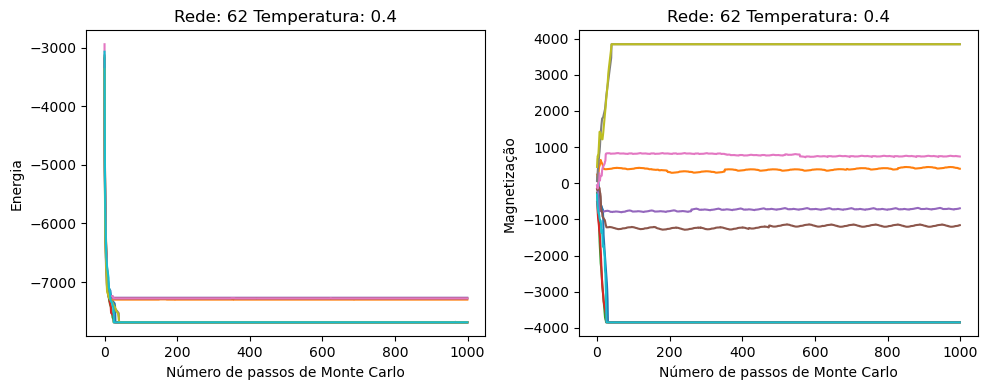

In [57]:
plot_execucoes(N=10, comprimento=62, temperatura=0.4)

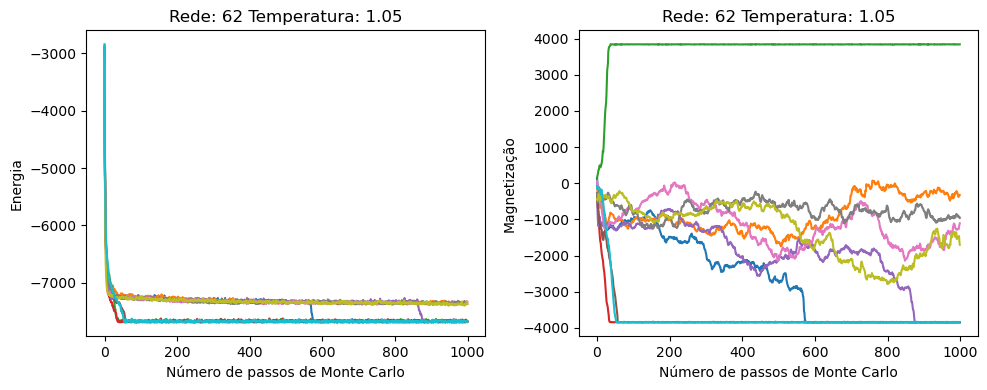

In [58]:
plot_execucoes(N=10, comprimento=62, temperatura=1.05)

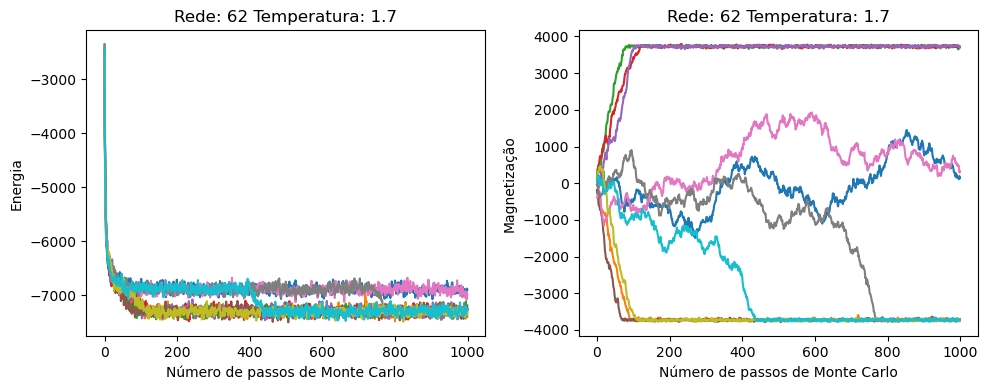

In [59]:
plot_execucoes(N=10, comprimento=62, temperatura=1.7)

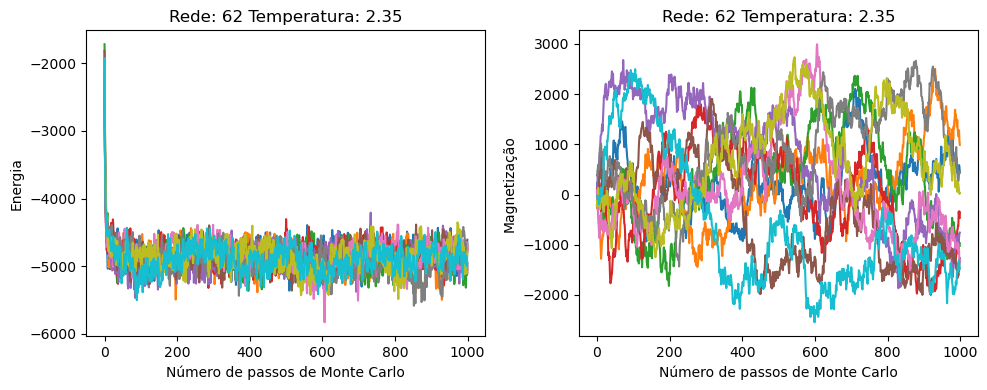

In [60]:
plot_execucoes(N=10, comprimento=62, temperatura=2.35)

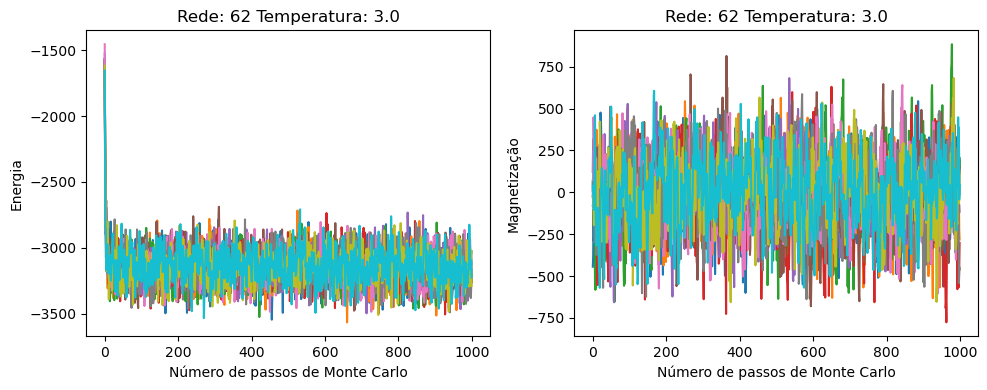

In [61]:
plot_execucoes(N=10, comprimento=62, temperatura=3.0)

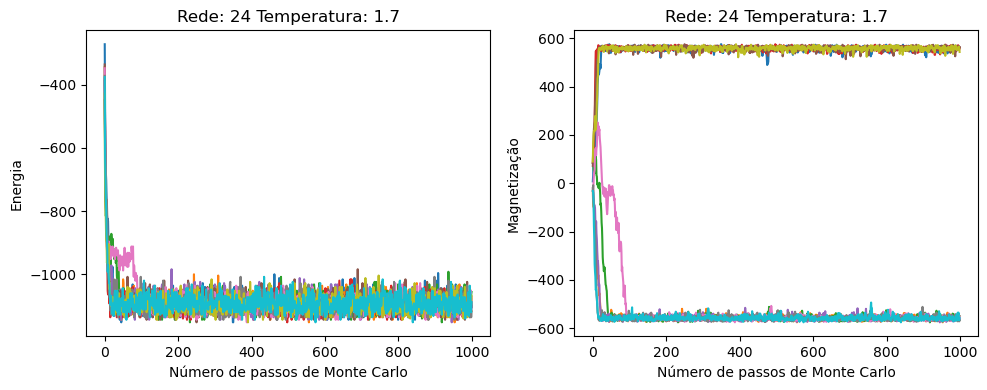

In [62]:
plot_execucoes(N=10, comprimento=24, temperatura=1.7)

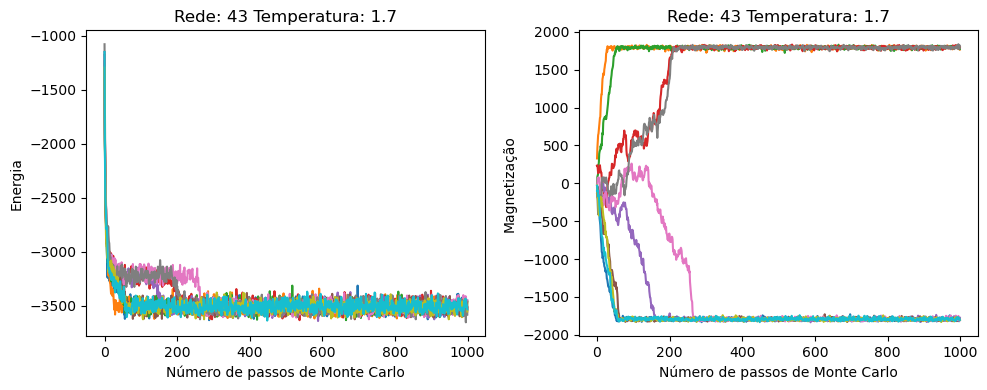

In [63]:
plot_execucoes(N=10, comprimento=43, temperatura=1.7)

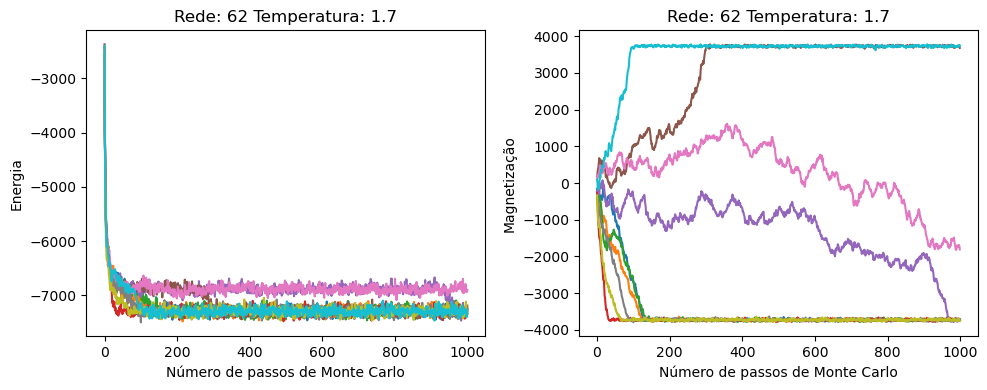

In [64]:
plot_execucoes(N=10, comprimento=62, temperatura=1.7)

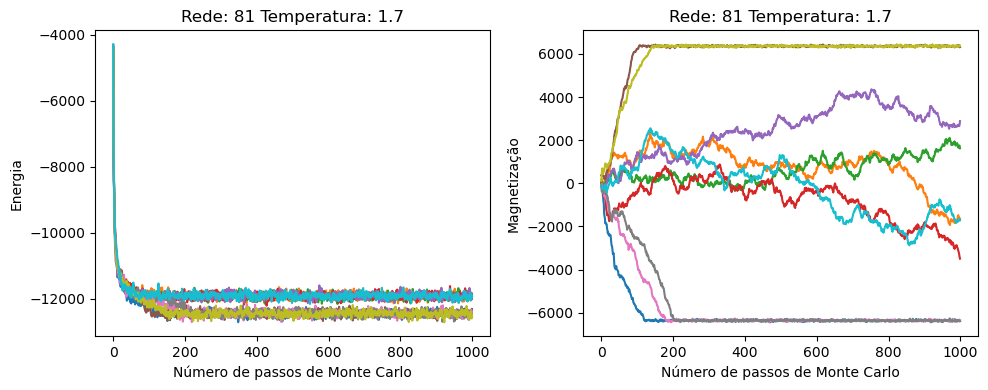

In [65]:
plot_execucoes(N=10, comprimento=81, temperatura=1.7)

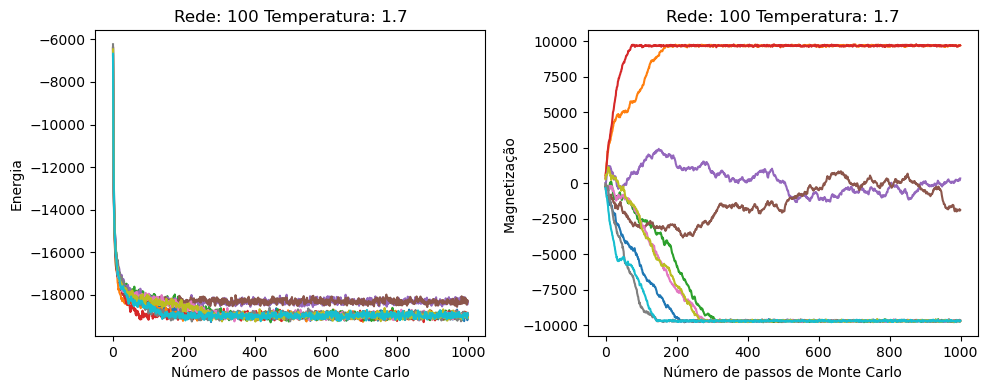

In [66]:
plot_execucoes(N=10, comprimento=100, temperatura=1.7)

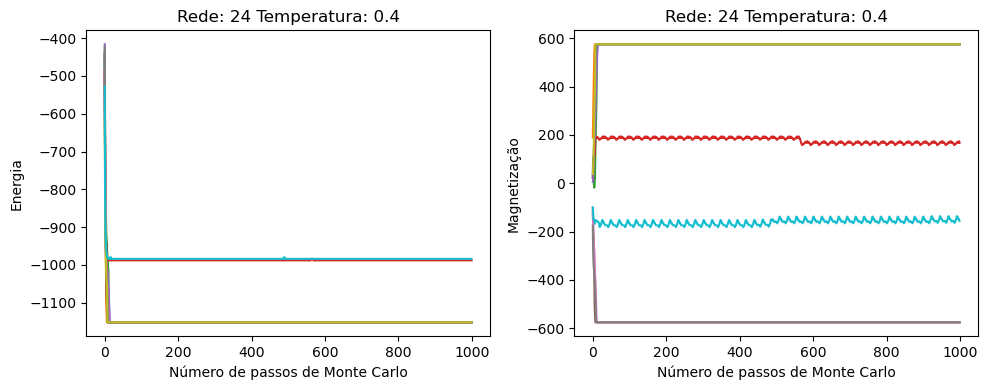

In [71]:
plot_execucoes(N=10, comprimento=24, temperatura=0.4)

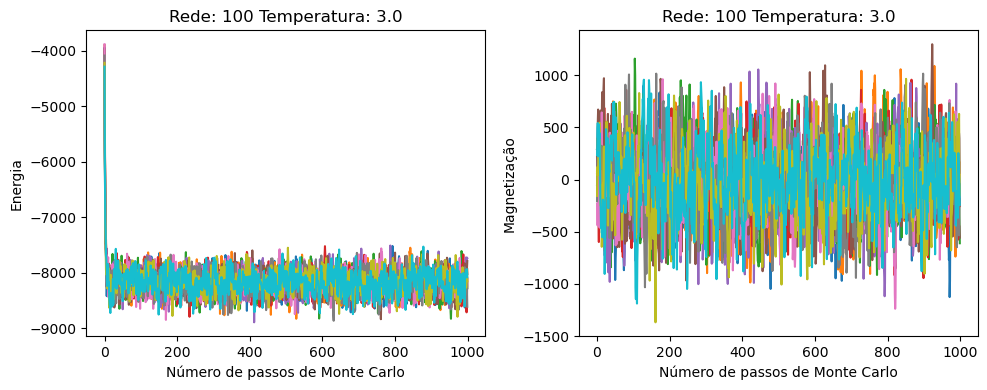

In [68]:
plot_execucoes(N=10, comprimento=100, temperatura=3.0)

# Descrição das configurações de análise

Para uma análise concisa dos experimentos, decidiu-se realizar experimentos com um tamanho de sistema fixo e 5 temperaturas uniformemente separadas, assim como com uma temperatura fixa e 5 tamanhos de sistema uniformemente separados. Essa distribuição uniforme foi dada de acordo com os limites propostos pelo professor. Dessa maneira, 10 configurações de teste/análise são propostas:


- Tamanho: 62, Temperatura: 0.4
- Tamanho: 62, Temperatura: 1.05
- Tamanho: 62, Temperatura: 1.7
- Tamanho: 62, Temperatura: 2.35
- Tamanho: 62, Temperatura: 3.0

- Tamanho: 24, Temperatura: 1.7
- Tamanho: 43, Temperatura: 1.7
- Tamanho: 62, Temperatura: 1.7 (repetida)
- Tamanho: 81, Temperatura: 1.7
- Tamanho: 100, Temperatura: 1.7

Além dessas configurações, após conversar com os colegas notamos que seria interessante analisar como o sistema se comportaria para as combinações com os valores mínimos e máximos de configurações porposta. Por isso, as seguintes duas configurações de teste/análise foram utilizadas:

- Tamanho: 24, Temperatura: 0.4
- Tamanho: 100, Temperatura: 3.0

## Análise sobre a energia do sistema

### Variação de Temperatura

O aumento da temperatura do sistema faz com que a convergência de energia seja muito mais lenta, além de que seus valores sejam mais próximo de valores maiores de energia. Em outras palavras, é possível que o aumento da temperatura faça com que a energia fique cada vez maior. No entanto, para tal análise, mais passos de Monte Carlo devem ser utilizados, o que aumentaria a complexidade de execução e não necessariamente geraria interpretações conclusivas.

### Variação de Comprimento

Com o aumento da rede, a energia do sistema convergiu cada vez mais para valores menores. Com uma rede de tamanho 24, a energia convergia para valores próximos de -1000, enquanto para uma rede de tamanho 100 a energia convergiu para valores próximos de -18000. Diferentemente da variação da temperatura, a variação do tamanho da rede não parece aumentar o tempo de convergência da energia. Ou seja, não é alterado o número de passos de Monte Carlo necessários, em geral, para que o sistema se estabilize.

### Mínimo e Máximo

Os casos extremos análisados mostram que com os valores mínimos, a energia do sistema parece ter um grau de convergência simples e rápido, enquanto para valres máximos, a convergẽncia não eseja nítida. Estes gráficos ajudama  corroborar com interpretações prévias dos resultados, onde nota-se que o aumento da temperatura faz com que a convergência da energia seja muito mais lenta. Com o aumento da rede para o caso máximo, por sua vez, nota-se que a energia tende a valores cada vez menores conforme aumenta o número de passos de Monte Carlo.

## Magnetização

### Variação de Temperatura

Para a temperatura mais baixa, 3 instâncias não convergiram, ficaram repetindo em padrões. Com o aumento da temperatura (T=2), houve uma tendência maior a convergir, mas com um aumento ainda maior (T=3), o gráfico voltou a ficar uma completa bagunça. Tal como para a energia, um aumento do número de passos de Monte Carlo não ajudou.

### Variação de Comprimento
 

Como no caso da energia, o aumento da rede aumentou os valores para os quais a magnetização converge e, também similarmente ao caso energético, não é possível afirmar que um aumento do tamanho da rede dificulta a convergência.

### Mínimo e Máximo

Novamente, o caso "exagerado" ficou não inteligível. Não houve convergência em nenhuma instância. Já o caso "básico" teve algumas instâncias que também não convergiram, mas no geral é bem comportado, convergindo rapidamente.